In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from PIL import Image
import random
import numpy as np

In [3]:
CLASS_NAMES = [ 'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 'Pneumonia',
                'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia']
PATH = Path('/home/dattran/data/xray-thesis/chestX-ray14/images')

In [4]:
df = pd.read_csv('Data_Entry_Clean.csv')
df.head()

,Index,Image Index,Follow-up #,Patient ID,Patient Gender,View Position,Age,Atelectasis,Cardiomegaly,Effusion,...,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia
0,0,00000001_000.png,0,1,1,1,58,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,00000001_001.png,1,1,1,1,58,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,00000001_002.png,2,1,1,1,58,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,00000002_000.png,0,2,1,1,81,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,00000003_000.png,0,3,0,1,81,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
d = {}
for cn in CLASS_NAMES:
    d[cn] = df[df[cn]==1]['Image Index'].values

In [7]:
no_finding_files = set(df['Image Index'].values)
for c, ims in d.items():
    no_finding_files = no_finding_files - set(ims)
no_finding_files = list(no_finding_files)
d['No Finding'] = no_finding_files

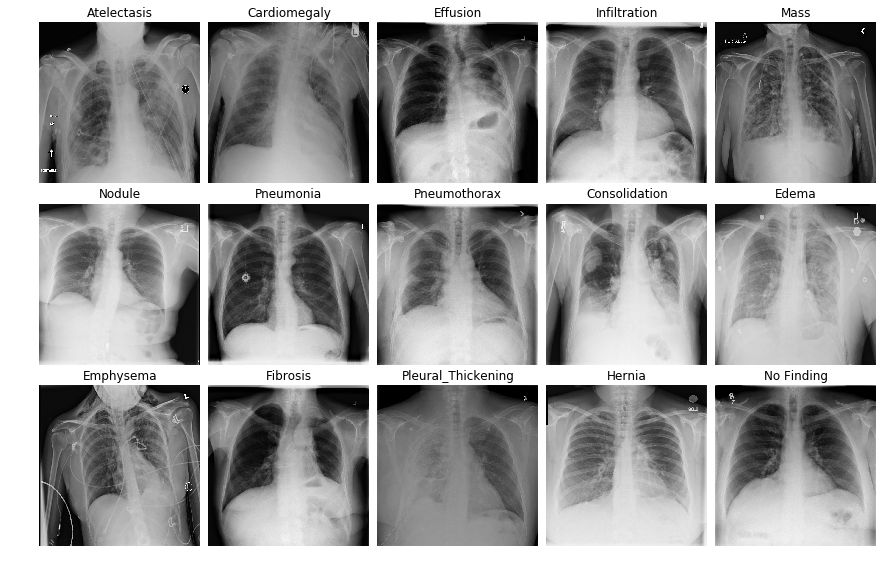

In [14]:
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    if i == 14: disease = 'No Finding'
    else: disease = CLASS_NAMES[i]
    image_file = np.random.choice(d[disease], 1)[0]
    image = Image.open(PATH/image_file)
    ax.imshow(image)
    ax.set_axis_off()
    ax.set_title(disease)
plt.subplots_adjust(wspace=0.05, hspace=0.001)
plt.savefig('cxr-14')